In [94]:
import dask.array as da
import dask.dataframe as dd
import numpy as np
import math as math
import geopandas as gpd
from matplotlib import pyplot as plt
import hvplot.pandas
from colorcet import fire
import geoviews as gv
import geoviews.tile_sources as gvts


import pandas as pd

In [2]:
# import data
od_df = dd.read_csv("data/il_od_main_JT00_2019.csv")

In [3]:
od_df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
npartitions=6,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
# get the length of the od df
len(od_df)

5254115

In [5]:
od_df['w_geocode'] = od_df['w_geocode'].astype(str)
od_df['h_geocode'] = od_df['h_geocode'].astype(str)

In [6]:
od_df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,170010001001001,170010002021001,1,0,1,0,0,1,0,1,0,0,20211018
1,170010001001001,170010004003001,1,0,0,1,0,1,0,1,0,0,20211018
2,170010001001001,170010004003004,1,1,0,0,0,1,0,1,0,0,20211018
3,170010001001001,170010004003020,1,0,1,0,0,0,1,0,1,0,20211018
4,170010001001001,170010008002079,1,0,1,0,0,0,1,0,1,0,20211018


In [7]:
# get the GEOID of block groups
od_df['w_geocode'] = od_df['w_geocode'].str[:12]
od_df['h_geocode'] = od_df['h_geocode'].str[:12]

In [8]:
od_df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,170010001001,170010002021,1,0,1,0,0,1,0,1,0,0,20211018
1,170010001001,170010004003,1,0,0,1,0,1,0,1,0,0,20211018
2,170010001001,170010004003,1,1,0,0,0,1,0,1,0,0,20211018
3,170010001001,170010004003,1,0,1,0,0,0,1,0,1,0,20211018
4,170010001001,170010008002,1,0,1,0,0,0,1,0,1,0,20211018


In [119]:
chicago_data_GEOID = gpd.read_file('data/chicago_data_GEOID.geojson').to_crs("epsg:4326")

In [120]:
chicago_data_GEOID

,GEOID,total_pop,median_rent,median_income,median_age,boardings,alightings,pct_college_degree,pct_racial_minorities,pct_property_owner,pct_commuter_PuT,DistRes,DistOffice,dist_to_cbd,geometry
0,170313018023,1560.0,800.00000,36250.0,28.7,165.0,54.0,0.109321,0.455128,0.372032,0.216612,4920.242486,4925.627689,4254.880809,"POLYGON ((-9766264.980 5137662.682, -9766246.9..."
1,170313018022,1178.0,796.00000,29643.0,25.4,10.0,71.0,0.043406,0.425297,0.223776,0.116402,5032.392357,4704.293453,4386.418475,"POLYGON ((-9766183.605 5138085.727, -9766183.1..."
2,170310714002,2018.0,1628.00000,159205.0,38.8,160.0,169.0,0.630701,0.174430,0.510791,0.457009,1447.692167,3316.507070,13219.823862,"POLYGON ((-9755791.151 5149027.292, -9755728.1..."
3,170310714004,739.0,1695.00000,238421.0,35.1,255.0,153.0,0.690117,0.239513,0.694118,0.538012,933.086191,3034.566761,13636.888713,"POLYGON ((-9756015.571 5149669.878, -9755930.3..."
4,170310702002,1187.0,1431.00000,181736.0,30.8,92.0,137.0,0.550672,0.059815,0.550000,0.467811,649.518623,3038.404730,13744.742055,"POLYGON ((-9757027.911 5150298.892, -9756959.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,170311710002,731.0,1145.33871,136382.0,54.0,29.0,99.0,0.250847,0.225718,1.000000,0.050132,6706.598460,4990.524149,18634.869923,"POLYGON ((-9772980.773 5152277.921, -9772958.8..."
2323,170311710003,1022.0,1145.33871,113295.0,46.8,24.0,82.0,0.427577,0.423679,0.785523,0.068716,7268.270085,5047.464674,19027.414486,"POLYGON ((-9773657.484 5152261.308, -9773630.5..."
2324,170311710005,1178.0,769.00000,84766.0,49.9,31.0,30.0,0.225989,0.268251,0.856790,0.145313,7807.147727,5113.042707,19441.614566,"POLYGON ((-9774219.536 5152794.556, -9774192.0..."
2325,170314606001,1200.0,840.00000,39837.0,36.7,26.0,96.0,0.153846,0.735833,0.539846,0.308311,5008.658827,4621.365901,20198.227232,"POLYGON ((-9747749.209 5121694.207, -9747736.7..."


In [10]:
chicago_bg_GEOID = list(chicago_data_GEOID['GEOID'])

In [11]:
od_df = od_df[od_df['w_geocode'].isin(chicago_bg_GEOID)]

In [12]:
od_df = od_df[od_df['h_geocode'].isin(chicago_bg_GEOID)]

In [57]:
# group by w_geocode
demand = od_df.groupby(['w_geocode','h_geocode'])['S000'].sum().compute()

In [58]:
demand = demand.reset_index()

In [59]:
demand = demand.sort_values(["S000"], ascending = False)

In [60]:
demand

,w_geocode,h_geocode,S000
303610,170318391001,170318391001,841
301794,170318391001,170310818001,784
302386,170318391001,170312801001,716
302475,170318391001,170313301003,647
303611,170318391001,170318391002,541
...,...,...,...
130306,170312413001,170312515004,1
130308,170312413001,170312519004,1
130309,170312413001,170312520004,1
130310,170312413001,170312602001,1


In [73]:
w_first = demand.loc[demand["w_geocode"].duplicated() == False, :]

In [74]:
w_first

,w_geocode,h_geocode,S000
303610,170318391001,170318391001,841
305860,170318391002,170318391001,371
232084,170317707001,170317707002,295
288670,170318362001,170313301003,242
339509,170319800001,170318391001,207
...,...,...,...
126638,170312315001,170318125001,1
126159,170312311001,170315803001,1
126108,170312309003,170318378002,1
125334,170312306005,170311503002,1


In [68]:
h_first = demand.loc[demand["h_geocode"].duplicated() == False, :]

In [69]:
h_first

,w_geocode,h_geocode,S000
303610,170318391001,170318391001,841
301794,170318391001,170310818001,784
302386,170318391001,170312801001,716
302475,170318391001,170313301003,647
303611,170318391001,170318391002,541
...,...,...,...
303435,170318391001,170318257001,4
303716,170318391001,170319801001,4
171450,170313204001,170314314004,3
303561,170318391001,170318361002,2


In [112]:
# highest employment number for the destination 
w_GEO = w_first[['w_geocode', 'S000']].merge(chicago_data_GEOID[["GEOID", "geometry"]], left_on='w_geocode', right_on='GEOID', how='left')

In [113]:
w_GEO = gpd.GeoDataFrame(w_GEO).set_crs("epsg:3857").to_crs("epsg:4326")

ValueError: The GeoSeries already has a CRS which is not equal to the passed CRS. Specify 'allow_override=True' to allow replacing the existing CRS without doing any transformation. If you actually want to transform the geometries, use 'GeoSeries.to_crs' instead.

In [111]:
w_GEO

,w_geocode,S000,GEOID,geometry
0,170318391001,841,170318391001,"POLYGON ((-9755848.815 5143167.615, -9755846.1..."
1,170318391002,371,170318391002,"POLYGON ((-9755845.698 5143111.247, -9755813.9..."
2,170317707001,295,170317707001,"POLYGON ((-9781664.139 5158289.053, -9781663.1..."
3,170318362001,242,170318362001,"POLYGON ((-9752280.023 5130291.017, -9752279.3..."
4,170319800001,207,170319800001,"POLYGON ((-9789463.516 5162053.835, -9789455.2..."
...,...,...,...,...
2246,170312315001,1,170312315001,"POLYGON ((-9764399.599 5145334.644, -9764372.3..."
2247,170312311001,1,170312311001,"POLYGON ((-9764563.016 5146423.577, -9764518.9..."
2248,170312309003,1,170312309003,"POLYGON ((-9764317.890 5147511.289, -9764294.2..."
2249,170312306005,1,170312306005,"POLYGON ((-9766750.778 5146793.762, -9766477.2..."


In [100]:
# highest employment number for the origin
h_GEO = h_first[['h_geocode', 'S000']].merge(chicago_data_GEOID[["GEOID", "geometry"]], left_on='h_geocode', right_on='GEOID', how='left')

In [101]:
h_GEO = gpd.GeoDataFrame(h_GEO)

In [102]:
h_GEO

,h_geocode,S000,GEOID,geometry
0,170318391001,841,170318391001,"POLYGON ((-9755848.815 5143167.615, -9755846.1..."
1,170310818001,784,170310818001,"POLYGON ((-9756500.924 5145481.652, -9756468.1..."
2,170312801001,716,170312801001,"POLYGON ((-9756886.090 5144315.815, -9756875.7..."
3,170313301003,647,170313301003,"POLYGON ((-9754624.189 5140637.095, -9754606.9..."
4,170318391002,541,170318391002,"POLYGON ((-9755845.698 5143111.247, -9755813.9..."
...,...,...,...,...
2315,170318257001,4,170318257001,"POLYGON ((-9746185.615 5107879.002, -9745996.4..."
2316,170319801001,4,170319801001,"POLYGON ((-9769654.770 5129982.688, -9769627.6..."
2317,170314314004,3,170314314004,"POLYGON ((-9747020.511 5125625.924, -9746934.2..."
2318,170318361002,2,170318361002,"POLYGON ((-9754796.846 5131349.866, -9754793.1..."


In [35]:
# get the employment destination that has the top 10 employment number
dest_bg = chicago_data[chicago_data['GEOID'].isin(list(demand["w_geocode"])[:10])]

In [37]:
# get the employment origin that has the top 10 employment number
origin_bg = chicago_data[chicago_data['GEOID'].isin(list(demand["h_geocode"])[:10])]

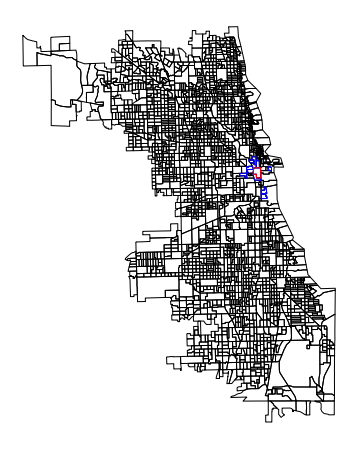

In [39]:
# plot the top 10 employment OD pair origins and destinations
# red is the desination block group, blue are the origin block groups
fig, ax = plt.subplots(figsize=(8, 8))
chicago_data.plot(ax=ax, facecolor='none', edgecolor='black')
origin_bg.plot(ax=ax, facecolor='none', edgecolor='blue')
dest_bg.plot(ax=ax, facecolor='none', edgecolor='red')
ax.set_axis_off()
ax.set_aspect("equal")
plt.show()

In [104]:
%%opts WMTS [width=800, height=800, xaxis=None, yaxis=None]

choro = w_GEO.hvplot(c='S000', 
                             width=500, 
                             height=400, 
                             alpha=0.5, 
                             geo=True, 
                             cmap='viridis', 
                             hover_cols=['w_geocode'])
gvts.ESRI * choro

AttributeError: 'list' object has no attribute 'xy'

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (S000,w_geocode)

In [103]:
w_map = w_GEO.hvplot(
    
    cmap=fire,
    datashade=True,
    frame_width=800,
    frame_height=600,
    geo=True, 
    crs=3857
)

gv.tile_sources.CartoDark * w_map

Invoked as dynamic_operation(height=400, scale=1.0, width=400, x_range=None, y_range=None)
Invoked as dynamic_operation(height=400, scale=1.0, width=400, x_range=None, y_range=None)


DataError: None of the available storage backends were able to support the supplied data format. SpatialPandasInterface raised following error:

 No module named 'spatialpandas'

SpatialPandasInterface expects a list of tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

:DynamicMap   []